In [128]:
!pip install tensorflow  opencv-python matplotlib

/Users/joshua/.zshenv:export:1: not valid in this context: Plug-Ins/JavaAppletPlugin.plugin/Contents/Home


In [129]:
import tensorflow as tf
#import os for working on directories
import os
import numpy as np

In [130]:
gpus=tf.config.experimental.list_physical_devices('GPU')
print(gpus)
print(len(gpus))

[]
0


In [131]:
#for out of memory (OOM) error prevention by setting GPU memory consumption growth
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

                            Remove dodgy iamges

In [132]:
import cv2
import imghdr
from matplotlib import pyplot as plt
#check file extensions for images

In [133]:
data_dir='data'

In [134]:
image_exts=['jpg','jpeg','bmp','png']

In [135]:
os.listdir(data_dir)


['happy', '.DS_Store', 'sad']

In [136]:
for image_class in os.listdir(data_dir):
  if image_class=='.DS_Store':
    continue
  for image in  os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('image not in image_ext {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
       print('issue with image {}'.format(image_path))   
       os.remove(image_path)

image not in image_ext data/sad/depositphotos_83965442-stock-photo-woman-silhouette-watching-sun-in.jpg
image not in image_ext data/sad/192px.svg
image not in image_ext data/sad/vector.svg
image not in image_ext data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
image not in image_ext data/sad/vector9.svg
image not in image_ext data/sad/vector8.svg
image not in image_ext data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
image not in image_ext data/sad/portrait-sad-man-260nw-126009806.jpg
image not in image_ext data/sad/39843138-sad-man.jpg
image not in image_ext data/sad/depressed-man-studio-shot-260nw-404652526.jpg
image not in image_ext data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
image not in image_ext data/sad/vector3.svg
image not in image_ext data/sad/CC_HE_1221887081_SituationalDepression-650x428.jpg
image not in image_ext data/sad/vector2.svg
image not in image_ext data/sad/vector6.sv

# Load Data

In [137]:
tf.keras.utils.image_dataset_from_directory??

In [138]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)
#building data pipeline

Found 286 files belonging to 2 classes.


In [139]:
#access data pipeline
data_iterator=data.as_numpy_iterator()

In [140]:
batch=data_iterator.next()

In [141]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [142]:
#lables represented as numpy arrays
batch[1].shape

(32,)

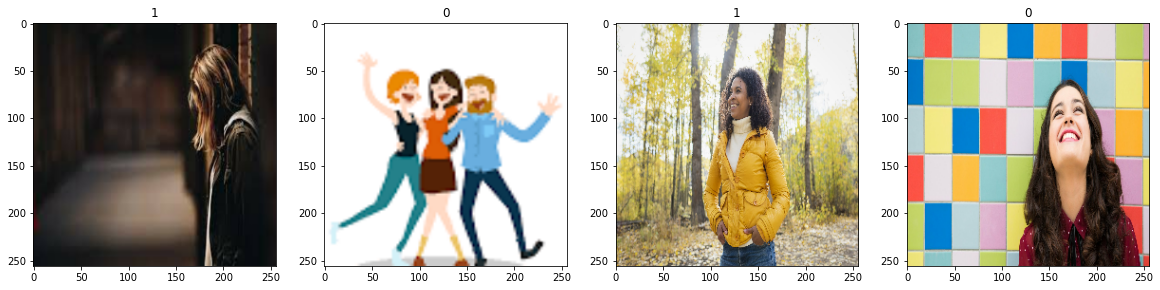

In [143]:
fig , ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
#0-HAPPY  
#1-SAD

#        DATA PREPROCESSING

In [144]:
data= data.map(lambda x, y: (x/255, y))

In [145]:
scaled_data_iterator= data.as_numpy_iterator()

In [146]:
scaled_batch = scaled_data_iterator.next()
scaled_batch[0][0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941]],

       ...,

       [[0.14901961, 0.14117648, 0.09019608],
        [0.14901961, 0.14117648, 0.09019608],
        [0.13965993, 0

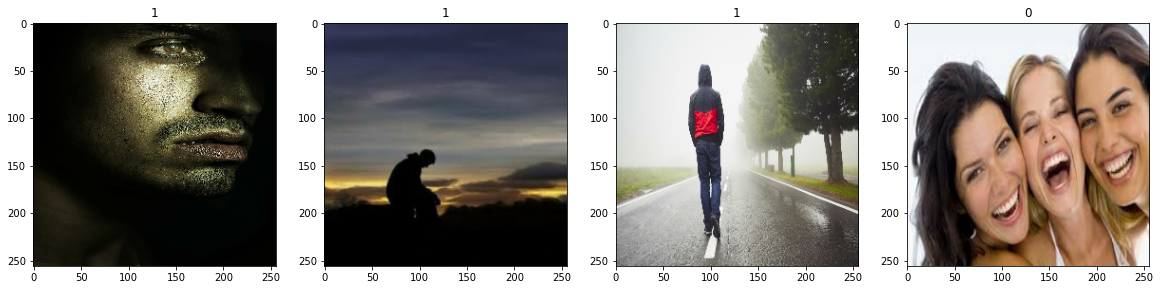

In [147]:
fig , ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(scaled_batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(scaled_batch[1][idx])

# SPLIT DATA

In [148]:
len(data)

9

In [149]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.1)+1

In [150]:
test_size+val_size+train_size

9

In [151]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# **MODEL**

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dense ,Flatten,Dropout

In [153]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(256, 256, 3)))

# Max Pooling Layer 1
model.add(MaxPooling2D())

# Convolutional Layer 2
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Max Pooling Layer 2
model.add(MaxPooling2D())

# Convolutional Layer 3
model.add(Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Max Pooling Layer 3
model.add(MaxPooling2D())

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(255, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))


In [154]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [155]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

Train

In [156]:
logdir='logs'

In [157]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [158]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 11s 1s/step - loss: 0.8032 - accuracy: 0.4844 - val_loss: 0.6937 - val_accuracy: 0.4688
Epoch 2/20
6/6 [==============================] - 11s 1s/step - loss: 0.6829 - accuracy: 0.5312 - val_loss: 0.6504 - val_accuracy: 0.5312
Epoch 3/20
6/6 [==============================] - 11s 1s/step - loss: 0.6477 - accuracy: 0.5677 - val_loss: 0.6125 - val_accuracy: 0.7031
Epoch 4/20
6/6 [==============================] - 11s 2s/step - loss: 0.6130 - accuracy: 0.6823 - val_loss: 0.5368 - val_accuracy: 0.8125
Epoch 5/20
6/6 [==============================] - 10s 1s/step - loss: 0.5340 - accuracy: 0.8229 - val_loss: 0.5591 - val_accuracy: 0.6719
Epoch 6/20
6/6 [==============================] - 11s 1s/step - loss: 0.4901 - accuracy: 0.7604 - val_loss: 0.4551 - val_accuracy: 0.8281
Epoch 7/20
6/6 [==============================] - 11s 1s/step - loss: 0.4207 - accuracy: 0.8438 - val_loss: 0.4227 - val_accuracy: 0.8438
Epoch 8/20
6/6 [==================

In [159]:
hist.history

{'loss': [0.8031808733940125,
  0.682873010635376,
  0.6476874947547913,
  0.6129533648490906,
  0.5339635014533997,
  0.4901069402694702,
  0.4206870496273041,
  0.3629401922225952,
  0.3509732782840729,
  0.23883230984210968,
  0.2735750675201416,
  0.19555068016052246,
  0.12393508106470108,
  0.09657314419746399,
  0.04891011491417885,
  0.04166463389992714,
  0.032899487763643265,
  0.021170958876609802,
  0.02476615272462368,
  0.014859291724860668],
 'accuracy': [0.484375,
  0.53125,
  0.5677083134651184,
  0.6822916865348816,
  0.8229166865348816,
  0.7604166865348816,
  0.84375,
  0.8489583134651184,
  0.84375,
  0.9166666865348816,
  0.90625,
  0.9427083134651184,
  0.9739583134651184,
  0.96875,
  0.984375,
  0.9947916865348816,
  0.9947916865348816,
  1.0,
  0.9947916865348816,
  0.9947916865348816],
 'val_loss': [0.6936739683151245,
  0.6504236459732056,
  0.612523078918457,
  0.5367558598518372,
  0.5591194033622742,
  0.4550856351852417,
  0.4227156639099121,
  0.4986332

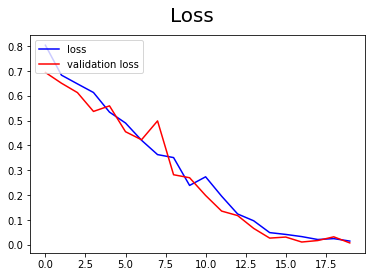

In [160]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='validation loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

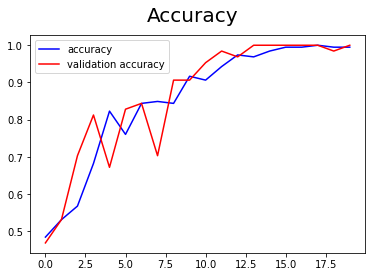

In [161]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='validation accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# **Evaluation**

In [162]:
from tensorflow.keras.metrics import Precision ,Recall,BinaryAccuracy

In [163]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [164]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 202ms/step


In [165]:
print(f'precision:{pre.result()},Recall:{re.result()},BinaryAccuracy:{acc.result()}')

precision:1.0,Recall:1.0,BinaryAccuracy:1.0


# TESTING ON NEW DATA

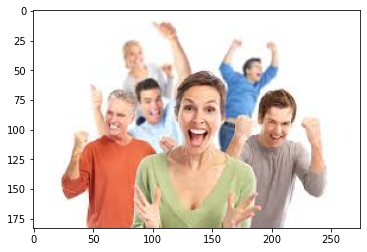

In [166]:
img=cv2.imread('happytest.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

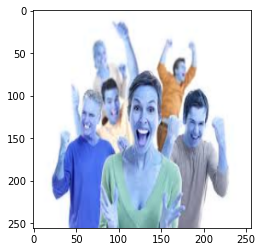

In [167]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [168]:
yhat=model.predict(np.expand_dims(resize,0))

1/1 [==============================] - 0s 24ms/step


In [169]:
yhat
#meaning happy image

array([[5.299426e-07]], dtype=float32)

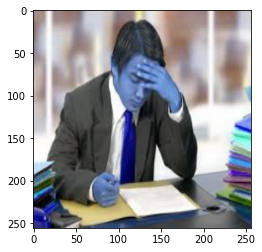

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)

In [170]:
img=cv2.imread('sadtest.jpeg')
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat=model.predict(np.expand_dims(resize,0))
yhat

In [171]:
"""if yhat >0.5
      sad
  else
      happy """
      

'if yhat >0.5\n      sad\n  else\n      happy '